# <span style="color:red;">Importing dependencies</span>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# <span style="color:red;" >Importing data files</span>

In [2]:
Accident_data = pd.read_csv(r"D:\Data science\UK_2016_Road_Safety_Data\Data\dftRoadSafety_Accidents_2016.csv")

C:\Users\Akdi\AppData\Local\Temp\ipykernel_8728\4293911798.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  Accident_data = pd.read_csv(r"D:\Data science\UK_2016_Road_Safety_Data\Data\dftRoadSafety_Accidents_2016.csv")


In [3]:
Casualties_data = pd.read_csv(r"D:\Data science\UK_2016_Road_Safety_Data\Data\Cas.csv")

In [4]:
Vehicle_data = pd.read_csv(r"D:\Data science\UK_2016_Road_Safety_Data\Data\Veh.csv")

# <span style="color:red;"> Objective</span>


# <span style="color:red;"> Data Exploration</span>

## <span style="color:blue;">1- Accident data</span>

In [5]:
pd.set_option('display.max.column',32)
# 136621 accidents and 32 features.

In [6]:
Accident_data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,319273.0,574564.0,-3.265390,55.058998,98,3,2,1,28/10/2016,6,06:45,917,S12000006,4,7076,6,30.0,3,4,4,725,0,0,4,1,2,0,0,2,1,NaN
136617,2016984131116,316143.0,568615.0,-3.312631,55.005033,98,3,2,2,01/11/2016,3,16:45,917,S12000006,4,7020,6,60.0,6,4,5,49,0,0,1,1,1,0,0,2,1,NaN
136618,2016984131216,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,27/10/2016,5,07:10,917,S12000006,2,74,3,70.0,0,-1,-1,0,0,0,6,1,2,0,0,2,1,NaN
136619,2016984131316,318673.0,566850.0,-3.272584,54.989597,98,3,1,3,29/10/2016,7,20:00,917,S12000006,4,724,6,40.0,0,-1,-1,0,0,0,4,1,1,0,0,2,1,NaN


In [7]:
#Accident_data["Accident_Severity"].value_counts()

In [8]:
#Accident_data["Number_of_Vehicles"].value_counts()

In [9]:
#Accident_data["Number_of_Casualties"].value_counts()

In [10]:
Accident_data.keys()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

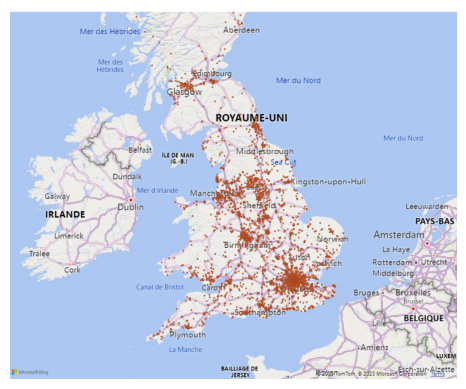

In [11]:
# Visualisition of all accident points
# The visual is made with Power BI
image_path=r"D:\Data science\UK_2016_Road_Safety_Data\Images_to_notebook\accident localization.png"
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

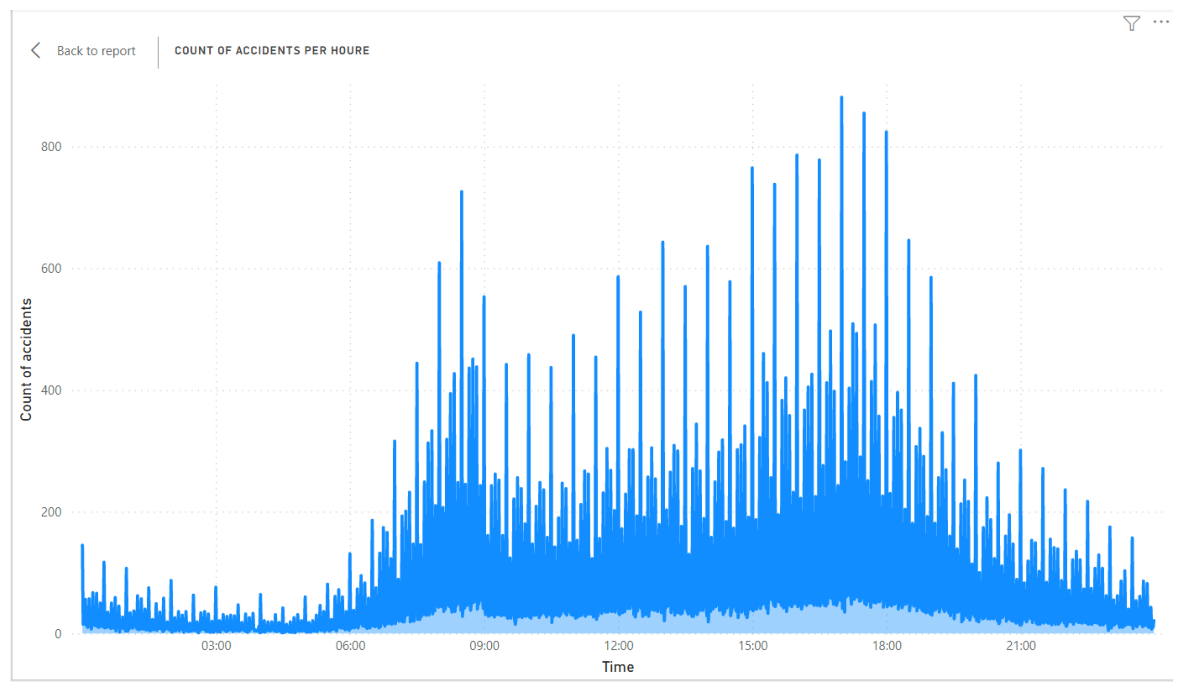

In [12]:
# Visualisition of the number of accidents per time
# The visual is made with Power BI : you can find the Power BI file with all visuals in the same folder.
image_path=r"D:\Data science\UK_2016_Road_Safety_Data\Images_to_notebook\number of accidents per time.png"
image = cv2.imread(image_path)
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Speed_limit', ylabel='count'>

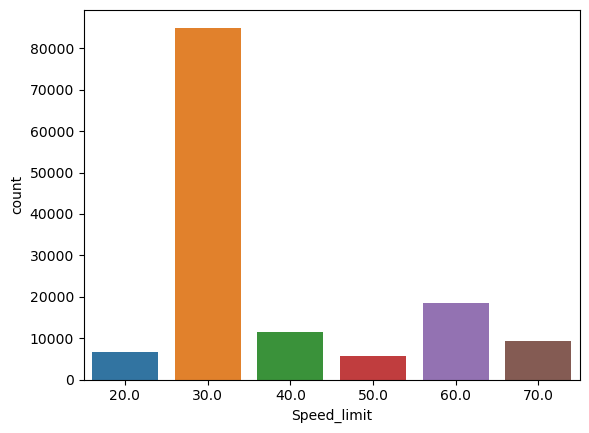

In [13]:
sns.countplot(data=Accident_data,x=Accident_data["Speed_limit"])

<AxesSubplot:xlabel='Weather_Conditions', ylabel='count'>

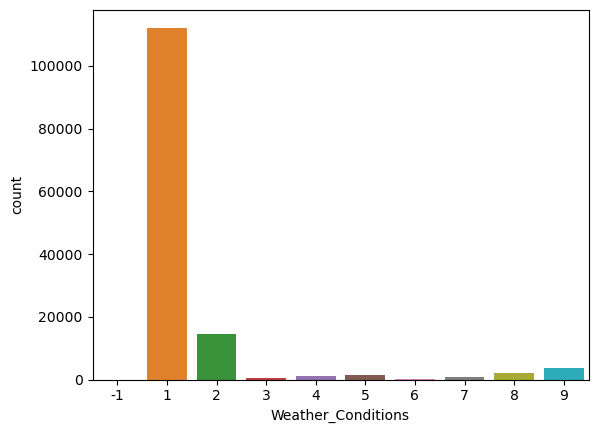

In [14]:
# Weather conditions
sns.countplot(data=Accident_data,x=Accident_data["Weather_Conditions"])
#1	Fine no high winds
#2	Raining no high winds
#3	Snowing no high winds
#4	Fine + high winds
#5	Raining + high winds
#6	Snowing + high winds
#7	Fog or mist
#8	Other
#9	Unknown
#-1	Data missing or out of range


<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='count'>

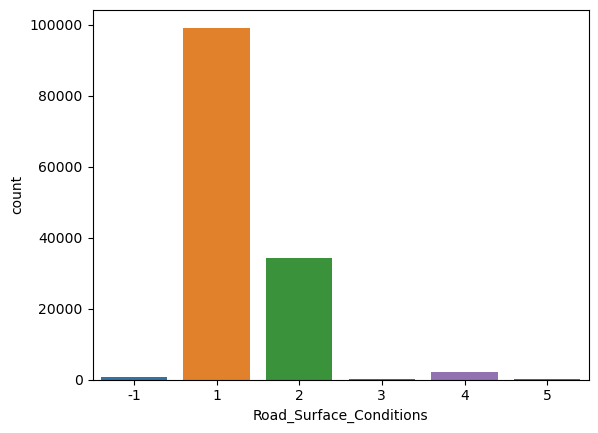

In [15]:
# Road surface conditions
sns.countplot(data=Accident_data,x=Accident_data["Road_Surface_Conditions"])
#code	label
#1	Dry
#2	Wet or damp
#3	Snow
#4	Frost or ice
#5	Flood over 3cm. deep
#6	Oil or diesel
#7	Mud
#-1	Data missing or out of range


## <span style="color:blue;">2- Casualty</span>

In [16]:
Casualties_data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2016010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181379,2016984131316,1,1,1,1,17,4,3,0,0,0,0,0,9,1,6
181380,2016984131316,1,2,2,1,17,4,3,0,0,1,0,0,9,-1,-1
181381,2016984131316,1,3,2,1,21,5,3,0,0,2,0,0,9,1,1
181382,2016984133416,1,1,1,1,48,8,3,0,0,0,0,0,9,1,-1


In [17]:
Casualties_data["Vehicle_Reference"].value_counts()

1     101002
2      73644
3       5457
4        942
5        193
6         94
7         27
8         15
9          4
10         3
11         2
21         1
Name: Vehicle_Reference, dtype: int64

<AxesSubplot:xlabel='Age_Band_of_Casualty', ylabel='count'>

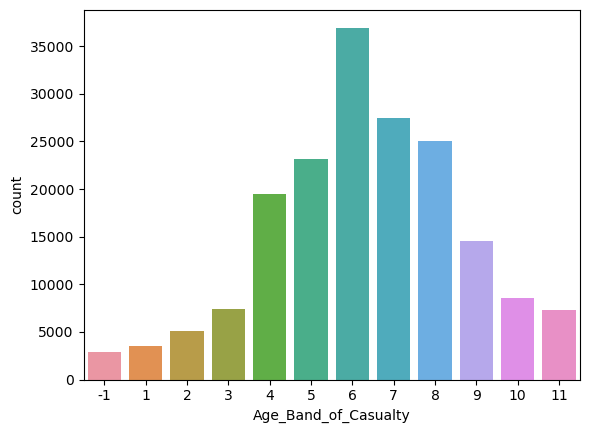

In [18]:
sns.countplot(data=Casualties_data,x=Casualties_data["Age_Band_of_Casualty"])
#code	label
#1	0 - 5
#2	6 - 10
#3	11 - 15
#4	16 - 20
#5	21 - 25
#6	26 - 35
#7	36 - 45
#8	46 - 55
#9	56 - 65
#10	66 - 75
#11	Over 75
#-1	Data missing or out of range


<AxesSubplot:xlabel='Casualty_IMD_Decile', ylabel='count'>

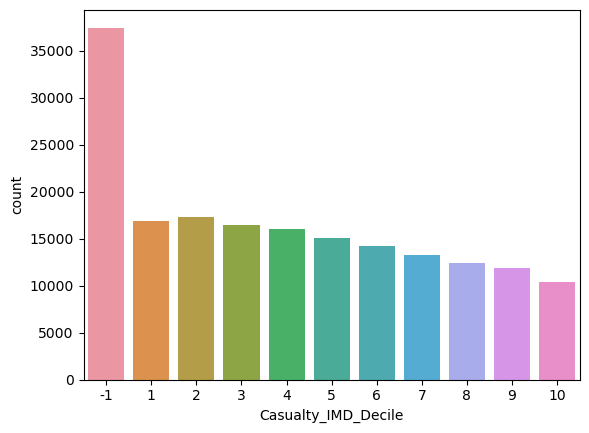

In [19]:
# IMD Decile: The Index of Multiple Deprivation (IMD) is a measure used in the United Kingdom to assess 
# the relative deprivation levels of different areas. It takes into account various factors such as income, employment, education, health, and living environment.
sns.countplot(data=Casualties_data,x=Casualties_data["Casualty_IMD_Decile"])

#code	label
#1	Most deprived 10%
#2	More deprived 10-20%
#3	More deprived 20-30%
#4	More deprived 30-40%
#5	More deprived 40-50%
#6	Less deprived 40-50%
#7	Less deprived 30-40%
#8	Less deprived 20-30%
#9	Less deprived 10-20%
#10	Least deprived 10%
#-1	Data missing or out of range


## <span style="color:blue;">3- Vehicle</span>

In [20]:
Vehicle_data

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2016010000005,1,8,0,6,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,3,1,3
1,2016010000005,2,2,0,18,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,4,1,4
2,2016010000006,1,9,0,18,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,10,1,10
3,2016010000008,1,9,0,18,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,8,1,8
4,2016010000016,1,11,0,18,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,9,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252495,2016984131116,1,9,0,18,0,8,0,0,0,0,1,1,6,2,24,5,1598,1,14,-1,1,-1
252496,2016984131116,2,9,0,18,0,8,0,0,7,0,1,1,2,2,62,9,1598,2,-1,-1,2,-1
252497,2016984131216,1,21,0,18,0,0,0,0,4,6,3,1,1,1,61,9,-1,-1,-1,3,1,3
252498,2016984131316,1,9,0,18,0,0,1,0,7,4,1,1,6,1,17,4,1796,1,13,6,1,6


In [21]:
Vehicle_data["Vehicle_Type"].value_counts()

 9     179615
 1      19047
 19     13125
 3       9152
 5       6704
 8       5234
 11      4998
 21      4262
 4       2232
 2       1907
 20      1557
 90      1431
 98      1088
 17       531
 10       458
 97       366
-1        336
 22       260
 16       113
 23        62
 18        22
Name: Vehicle_Type, dtype: int64

# <span style="color:red;"> Data Preprocessing</span>

In [22]:
Accident_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [23]:
Accident_data.keys()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [24]:
# First, we eliminate some non-relevant features
non_relevant_accident_columns = ["Location_Easting_OSGR","Location_Northing_OSGR","Local_Authority_(Highway)","Local_Authority_(District)","Police_Force","Number_of_Vehicles","Number_of_Casualties","1st_Road_Number",
                                "Junction_Detail","Junction_Control","2nd_Road_Class","2nd_Road_Number",
                              "Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Special_Conditions_at_Site"
                                 ,"Carriageway_Hazards","LSOA_of_Accident_Location","Did_Police_Officer_Attend_Scene_of_Accident"]
non_relevant_Vehicle_columns = ["Vehicle_Reference","Vehicle_Manoeuvre","Vehicle_Location-Restricted_Lane","Junction_Location",
                                "Skidding_and_Overturning","Hit_Object_in_Carriageway","Vehicle_Leaving_Carriageway",
                                "Hit_Object_off_Carriageway","1st_Point_of_Impact","Was_Vehicle_Left_Hand_Drive?","Age_of_Driver"
                                ,"Engine_Capacity_(CC)","Propulsion_Code","Towing_and_Articulation"]

In [25]:
table_data_1 = Accident_data.drop(columns=non_relevant_accident_columns,axis=1)

In [26]:
table_data_1

,Accident_Index,Longitude,Latitude,Accident_Severity,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2016010000005,-0.279323,51.584754,3,01/11/2016,3,02:30,3,6,30.0,5,1,1,1
1,2016010000006,0.184928,51.449595,3,01/11/2016,3,00:37,3,6,30.0,4,1,1,1
2,2016010000008,-0.473837,51.543563,3,01/11/2016,3,01:25,3,1,30.0,4,1,1,1
3,2016010000016,-0.164442,51.404958,3,01/11/2016,3,09:15,3,6,30.0,1,1,1,1
4,2016010000018,-0.406580,51.483139,3,01/11/2016,3,07:53,3,3,40.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,-3.265390,55.058998,3,28/10/2016,6,06:45,4,6,30.0,4,1,2,2
136617,2016984131116,-3.312631,55.005033,3,01/11/2016,3,16:45,4,6,60.0,1,1,1,2
136618,2016984131216,-3.208249,55.048803,3,27/10/2016,5,07:10,2,3,70.0,6,1,2,2
136619,2016984131316,-3.272584,54.989597,3,29/10/2016,7,20:00,4,6,40.0,4,1,1,2


In [27]:
table_data_2 = Vehicle_data.drop(columns = non_relevant_Vehicle_columns,axis=1)
table_data_2

,Accident_Index,Vehicle_Type,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2016010000005,8,1,1,8,-1,3,1,3
1,2016010000005,2,6,1,5,4,4,1,4
2,2016010000006,9,6,2,7,1,10,1,10
3,2016010000008,9,6,1,5,5,8,1,8
4,2016010000016,11,1,1,8,7,9,1,9
...,...,...,...,...,...,...,...,...,...
252495,2016984131116,9,6,2,5,14,-1,1,-1
252496,2016984131116,9,2,2,9,-1,-1,2,-1
252497,2016984131216,21,1,1,9,-1,3,1,3
252498,2016984131316,9,6,1,4,13,6,1,6


In [28]:
# Separate the day number & the month number in the date column, the year is not important in that context

table_data_1.dtypes

# the date columns is represented in a string format not a date format 

# Before proceeding to a splitting we have to makr sure that there is no missing data in the date column


Accident_Index              object
Longitude                  float64
Latitude                   float64
Accident_Severity            int64
Date                        object
Day_of_Week                  int64
Time                        object
1st_Road_Class               int64
Road_Type                    int64
Speed_limit                float64
Light_Conditions             int64
Weather_Conditions           int64
Road_Surface_Conditions      int64
Urban_or_Rural_Area          int64
dtype: object

In [29]:
table_data_1["Date"].isna().sum()
# Fortunately there is no missing values 

0

In [30]:
# Splitting the Date column into three columns which type must be int
table_data_1[['day_number', 'month_number','year']] = table_data_1['Date'].str.split('/', expand=True).astype(int)

In [31]:
table_data_1

,Accident_Index,Longitude,Latitude,Accident_Severity,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,day_number,month_number,year
0,2016010000005,-0.279323,51.584754,3,01/11/2016,3,02:30,3,6,30.0,5,1,1,1,1,11,2016
1,2016010000006,0.184928,51.449595,3,01/11/2016,3,00:37,3,6,30.0,4,1,1,1,1,11,2016
2,2016010000008,-0.473837,51.543563,3,01/11/2016,3,01:25,3,1,30.0,4,1,1,1,1,11,2016
3,2016010000016,-0.164442,51.404958,3,01/11/2016,3,09:15,3,6,30.0,1,1,1,1,1,11,2016
4,2016010000018,-0.406580,51.483139,3,01/11/2016,3,07:53,3,3,40.0,1,1,1,1,1,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,-3.265390,55.058998,3,28/10/2016,6,06:45,4,6,30.0,4,1,2,2,28,10,2016
136617,2016984131116,-3.312631,55.005033,3,01/11/2016,3,16:45,4,6,60.0,1,1,1,2,1,11,2016
136618,2016984131216,-3.208249,55.048803,3,27/10/2016,5,07:10,2,3,70.0,6,1,2,2,27,10,2016
136619,2016984131316,-3.272584,54.989597,3,29/10/2016,7,20:00,4,6,40.0,4,1,1,2,29,10,2016


In [32]:
table_data_1

,Accident_Index,Longitude,Latitude,Accident_Severity,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,day_number,month_number,year
0,2016010000005,-0.279323,51.584754,3,01/11/2016,3,02:30,3,6,30.0,5,1,1,1,1,11,2016
1,2016010000006,0.184928,51.449595,3,01/11/2016,3,00:37,3,6,30.0,4,1,1,1,1,11,2016
2,2016010000008,-0.473837,51.543563,3,01/11/2016,3,01:25,3,1,30.0,4,1,1,1,1,11,2016
3,2016010000016,-0.164442,51.404958,3,01/11/2016,3,09:15,3,6,30.0,1,1,1,1,1,11,2016
4,2016010000018,-0.406580,51.483139,3,01/11/2016,3,07:53,3,3,40.0,1,1,1,1,1,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,-3.265390,55.058998,3,28/10/2016,6,06:45,4,6,30.0,4,1,2,2,28,10,2016
136617,2016984131116,-3.312631,55.005033,3,01/11/2016,3,16:45,4,6,60.0,1,1,1,2,1,11,2016
136618,2016984131216,-3.208249,55.048803,3,27/10/2016,5,07:10,2,3,70.0,6,1,2,2,27,10,2016
136619,2016984131316,-3.272584,54.989597,3,29/10/2016,7,20:00,4,6,40.0,4,1,1,2,29,10,2016


In [33]:
# Now we drop the date & year columns
table_data_1 = table_data_1.drop(columns=["Date","year"],axis=1)

In [34]:
table_data_1

,Accident_Index,Longitude,Latitude,Accident_Severity,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,day_number,month_number
0,2016010000005,-0.279323,51.584754,3,3,02:30,3,6,30.0,5,1,1,1,1,11
1,2016010000006,0.184928,51.449595,3,3,00:37,3,6,30.0,4,1,1,1,1,11
2,2016010000008,-0.473837,51.543563,3,3,01:25,3,1,30.0,4,1,1,1,1,11
3,2016010000016,-0.164442,51.404958,3,3,09:15,3,6,30.0,1,1,1,1,1,11
4,2016010000018,-0.406580,51.483139,3,3,07:53,3,3,40.0,1,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,-3.265390,55.058998,3,6,06:45,4,6,30.0,4,1,2,2,28,10
136617,2016984131116,-3.312631,55.005033,3,3,16:45,4,6,60.0,1,1,1,2,1,11
136618,2016984131216,-3.208249,55.048803,3,5,07:10,2,3,70.0,6,1,2,2,27,10
136619,2016984131316,-3.272584,54.989597,3,7,20:00,4,6,40.0,4,1,1,2,29,10


In [35]:
# Splitting the time column into hour and minute columns which type must be int

table_data_1["Time"].isna().sum()

2

In [36]:
table_data_1 = table_data_1.dropna(subset=["Time"])

In [37]:
table_data_1["Time"].isna().sum()

0

In [38]:
# Splitting the time column into hour and minute columns which type must be int

table_data_1[["Hour","minute"]] = table_data_1["Time"].str.split(':', expand=True).astype(int)

C:\Users\Akdi\AppData\Local\Temp\ipykernel_8728\1624660454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data_1[["Hour","minute"]] = table_data_1["Time"].str.split(':', expand=True).astype(int)
C:\Users\Akdi\AppData\Local\Temp\ipykernel_8728\1624660454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data_1[["Hour","minute"]] = table_data_1["Time"].str.split(':', expand=True).astype(int)


In [39]:
table_data_1 = table_data_1.drop(columns=["Time","minute"],axis=1)

In [40]:
# keep in mind that the hour column is our target

# <span style="color:green;"> Handling missing values</span>

In [41]:
table_data_1.isna().sum()

Accident_Index              0
Longitude                   7
Latitude                    7
Accident_Severity           0
Day_of_Week                 0
1st_Road_Class              0
Road_Type                   0
Speed_limit                37
Light_Conditions            0
Weather_Conditions          0
Road_Surface_Conditions     0
Urban_or_Rural_Area         0
day_number                  0
month_number                0
Hour                        0
dtype: int64

In [42]:
table_data_1 = table_data_1.dropna()

In [43]:
table_data_1.isna().sum()

Accident_Index             0
Longitude                  0
Latitude                   0
Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
day_number                 0
month_number               0
Hour                       0
dtype: int64

In [44]:
table_data_2.isna().sum()

Accident_Index               0
Vehicle_Type                 0
Journey_Purpose_of_Driver    0
Sex_of_Driver                0
Age_Band_of_Driver           0
Age_of_Vehicle               0
Driver_IMD_Decile            0
Driver_Home_Area_Type        0
Vehicle_IMD_Decile           0
dtype: int64

# <span style="color:green;"> Merging both tables</span>

In [45]:
table_data_1.shape

(136575, 15)

In [46]:
table_data_2.shape

(252500, 9)

In [47]:
data = pd.merge(table_data_2,table_data_1,on = "Accident_Index" , how="left")

In [48]:
data

,Accident_Index,Vehicle_Type,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Longitude,Latitude,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,day_number,month_number,Hour
0,2016010000005,8,1,1,8,-1,3,1,3,-0.279323,51.584754,3.0,3.0,3.0,6.0,30.0,5.0,1.0,1.0,1.0,1.0,11.0,2.0
1,2016010000005,2,6,1,5,4,4,1,4,-0.279323,51.584754,3.0,3.0,3.0,6.0,30.0,5.0,1.0,1.0,1.0,1.0,11.0,2.0
2,2016010000006,9,6,2,7,1,10,1,10,0.184928,51.449595,3.0,3.0,3.0,6.0,30.0,4.0,1.0,1.0,1.0,1.0,11.0,0.0
3,2016010000008,9,6,1,5,5,8,1,8,-0.473837,51.543563,3.0,3.0,3.0,1.0,30.0,4.0,1.0,1.0,1.0,1.0,11.0,1.0
4,2016010000016,11,1,1,8,7,9,1,9,-0.164442,51.404958,3.0,3.0,3.0,6.0,30.0,1.0,1.0,1.0,1.0,1.0,11.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252495,2016984131116,9,6,2,5,14,-1,1,-1,-3.312631,55.005033,3.0,3.0,4.0,6.0,60.0,1.0,1.0,1.0,2.0,1.0,11.0,16.0
252496,2016984131116,9,2,2,9,-1,-1,2,-1,-3.312631,55.005033,3.0,3.0,4.0,6.0,60.0,1.0,1.0,1.0,2.0,1.0,11.0,16.0
252497,2016984131216,21,1,1,9,-1,3,1,3,-3.208249,55.048803,3.0,5.0,2.0,3.0,70.0,6.0,1.0,2.0,2.0,27.0,10.0,7.0
252498,2016984131316,9,6,1,4,13,6,1,6,-3.272584,54.989597,3.0,7.0,4.0,6.0,40.0,4.0,1.0,1.0,2.0,29.0,10.0,20.0


In [49]:
data = data.dropna()

In [50]:
Label = data["Hour"]
dataset = data.drop(columns = ["Hour","Accident_Index"] )

# <span style="color:green;"> Correlation insights</span>


<AxesSubplot:>

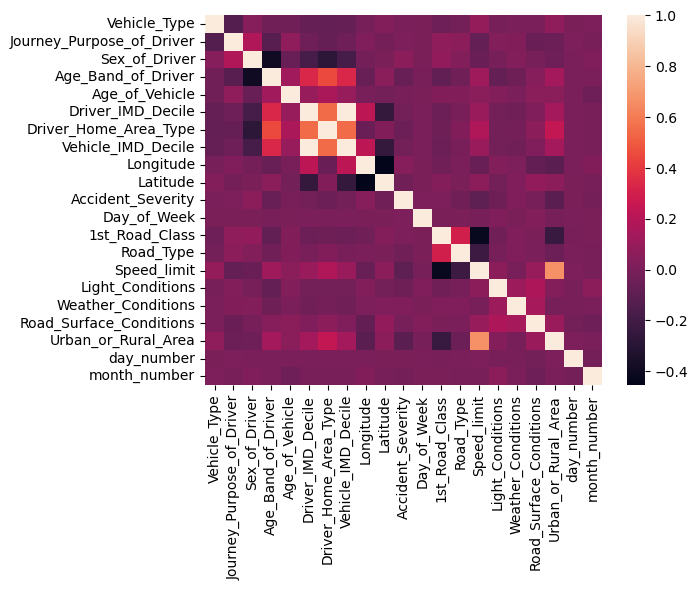

In [51]:
sns.heatmap(dataset.corr())

In [52]:
dataset = dataset.drop(columns = ["Vehicle_IMD_Decile"],axis = 1)

# <span style="color:green;"> Scaling the dataset</span>

In [53]:
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [54]:
display(pd.DataFrame(dataset).describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05,2.524190e+05
mean,4.255172e-14,4.194467e-14,-2.253080e-14,4.110273e-15,5.431381e-15,1.937207e-14,6.630020e-14,-2.536842e-15,-2.584917e-15,1.091183e-13,1.478901e-15,-7.614264e-14,-1.448674e-14,-4.897767e-13,-3.097979e-14,7.774778e-15,-9.375921e-14,-7.330899e-13,8.024338e-16,-1.107554e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.088542e+00,-2.876212e+00,-3.873132e+00,-2.300894e+00,-1.114126e+00,-1.245099e+00,-1.728656e+00,-4.378857e+00,-1.826112e+00,-4.482283e+00,-1.632110e+00,-2.086155e+00,-2.466262e+00,-1.290851e+00,-1.787979e+00,-1.527790e+00,-4.007996e+00,-7.547793e-01,-1.671463e+00,-1.625253e+00
25%,-7.888899e-02,-1.370330e+00,-6.772715e-01,-3.191028e-01,-1.114126e+00,-1.245099e+00,1.058350e-01,-6.434860e-01,-7.136803e-01,4.216289e-01,-5.830949e-01,-7.235845e-01,-1.273028e+00,-5.953368e-01,-5.712718e-01,-3.199127e-01,-4.932463e-01,-7.547793e-01,-8.685117e-01,-7.528471e-01
50%,-7.888899e-02,6.375113e-01,-6.772715e-01,1.119581e-02,-1.120550e-01,-1.505642e-01,1.058350e-01,6.863108e-02,-3.182368e-01,4.216289e-01,-5.858710e-02,-7.235845e-01,5.168217e-01,-5.953368e-01,-5.712718e-01,-3.199127e-01,-4.932463e-01,-7.547793e-01,-6.556006e-02,1.195585e-01
75%,-7.888899e-02,6.375113e-01,9.206590e-01,6.717930e-01,7.230046e-01,9.439706e-01,1.058350e-01,8.168067e-01,6.610085e-01,4.216289e-01,9.904284e-01,1.320272e+00,5.168217e-01,7.956927e-01,1.253789e+00,-3.199127e-01,1.264128e+00,1.324891e+00,8.520990e-01,9.919641e-01
max,8.907021e+00,6.375113e-01,2.518589e+00,1.662689e+00,1.157878e+01,1.764872e+00,1.940326e+00,2.196275e+00,5.743080e+00,4.216289e-01,1.514936e+00,1.320272e+00,2.306672e+00,2.186722e+00,3.078849e+00,4.511598e+00,6.536253e+00,1.324891e+00,1.769758e+00,1.573568e+00


# <span style="color:red;"> Modeling</span>

# <span style="color:green;"> Simple scikit-learn models</span>

In [55]:
linear_model = LogisticRegression()
svm_classifier = SVC()
tree_classifier = RandomForestClassifier()
knn = KNeighborsClassifier()
boosting_classifier = GradientBoostingClassifier()

In [56]:
x_train,x_test,y_train,y_test = train_test_split(dataset,Label,random_state=0)

In [57]:
linear_model.fit(x_train,y_train)

In [58]:
predictions = linear_model.predict(x_test)

In [59]:
acc = accuracy_score(y_test,predictions)

In [60]:
acc

In [61]:
tree_classifier.fit(x_train,y_train)

In [62]:
predictions = tree_classifier.predict(x_test)

In [63]:
acc= accuracy_score(y_test,predictions)

In [64]:
acc

In [65]:
knn.fit(x_train,y_train)

In [66]:
acc= accuracy_score(y_test,knn.predict(x_test))

In [67]:
acc

In [68]:
boosting_classifier.fit(x_train,y_train)

# <span style="color:green;"> Deep Learning: Neural Networks</span>

In [69]:
dataset.shape

(252419, 20)

In [70]:
len(Label.value_counts())

24

In [71]:
X_train, X_test, y_train, y_test = train_test_split(dataset, Label, test_size=0.2, random_state=42)

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax') ])
# A sequantial model with 24 output units for 24 classes

In [73]:
# Compiling the model
# Categorical cross-entropy is used since we are in a multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# Define a callback to save the best model during training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      monitor='val_loss',
                                                      mode='min',
                                                      verbose=1)


In [75]:
# One-hot encoding for the labels since the activation function used in the output layer is a softmax 
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=24)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=24)

In [76]:
#Training the model
history = model.fit(X_train, y_train_encoded, epochs=60, batch_size=64, validation_data=(X_test, y_test_encoded), callbacks=[model_checkpoint])

Epoch 1/60
3144/3156 [============================>.] - ETA: 0s - loss: 2.6018 - accuracy: 0.1329
Epoch 1: val_loss improved from inf to 2.53211, saving model to best_model.h5
3156/3156 [==============================] - 8s 2ms/step - loss: 2.6017 - accuracy: 0.1329 - val_loss: 2.5321 - val_accuracy: 0.1464
Epoch 2/60
3154/3156 [============================>.] - ETA: 0s - loss: 2.5227 - accuracy: 0.1488
Epoch 2: val_loss improved from 2.53211 to 2.51411, saving model to best_model.h5
3156/3156 [==============================] - 8s 3ms/step - loss: 2.5227 - accuracy: 0.1488 - val_loss: 2.5141 - val_accuracy: 0.1482
Epoch 3/60
3146/3156 [============================>.] - ETA: 0s - loss: 2.5061 - accuracy: 0.1519
Epoch 3: val_loss improved from 2.51411 to 2.50574, saving model to best_model.h5
3156/3156 [==============================] - 7s 2ms/step - loss: 2.5060 - accuracy: 0.1520 - val_loss: 2.5057 - val_accuracy: 0.1509
Epoch 4/60
3143/3156 [============================>.] - ETA: 0s -

3147/3156 [============================>.] - ETA: 0s - loss: 2.4378 - accuracy: 0.1723
Epoch 29: val_loss did not improve from 2.48006
3156/3156 [==============================] - 7s 2ms/step - loss: 2.4377 - accuracy: 0.1723 - val_loss: 2.4852 - val_accuracy: 0.1590
Epoch 30/60
3126/3156 [============================>.] - ETA: 0s - loss: 2.4377 - accuracy: 0.1735
Epoch 30: val_loss did not improve from 2.48006
3156/3156 [==============================] - 7s 2ms/step - loss: 2.4373 - accuracy: 0.1736 - val_loss: 2.4837 - val_accuracy: 0.1594
Epoch 31/60
3154/3156 [============================>.] - ETA: 0s - loss: 2.4365 - accuracy: 0.1737
Epoch 31: val_loss did not improve from 2.48006
3156/3156 [==============================] - 7s 2ms/step - loss: 2.4365 - accuracy: 0.1736 - val_loss: 2.4855 - val_accuracy: 0.1574
Epoch 32/60
3117/3156 [============================>.] - ETA: 0s - loss: 2.4348 - accuracy: 0.1745
Epoch 32: val_loss did not improve from 2.48006
3156/3156 [==============

3135/3156 [============================>.] - ETA: 0s - loss: 2.4212 - accuracy: 0.1780
Epoch 58: val_loss did not improve from 2.48006
3156/3156 [==============================] - 9s 3ms/step - loss: 2.4210 - accuracy: 0.1781 - val_loss: 2.4916 - val_accuracy: 0.1610
Epoch 59/60
3154/3156 [============================>.] - ETA: 0s - loss: 2.4207 - accuracy: 0.1781
Epoch 59: val_loss did not improve from 2.48006
3156/3156 [==============================] - 9s 3ms/step - loss: 2.4207 - accuracy: 0.1781 - val_loss: 2.4926 - val_accuracy: 0.1602
Epoch 60/60
3142/3156 [============================>.] - ETA: 0s - loss: 2.4201 - accuracy: 0.1798
Epoch 60: val_loss did not improve from 2.48006
3156/3156 [==============================] - 9s 3ms/step - loss: 2.4201 - accuracy: 0.1797 - val_loss: 2.4922 - val_accuracy: 0.1616


In [77]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

1578/1578 [==============================] - 3s 2ms/step


In [78]:
accuracy

0.16155613659773393

In [79]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.16      0.09      0.12       667\n         1.0       0.16      0.08      0.10       466\n         2.0       0.11      0.02      0.03       345\n         3.0       0.08      0.02      0.03       281\n         4.0       0.11      0.00      0.01       273\n         5.0       0.14      0.03      0.05       412\n         6.0       0.16      0.07      0.10      1024\n         7.0       0.16      0.14      0.15      2363\n         8.0       0.23      0.37      0.28      3617\n         9.0       0.14      0.05      0.07      2510\n        10.0       0.14      0.03      0.05      2411\n        11.0       0.13      0.04      0.06      2660\n        12.0       0.14      0.13      0.14      3043\n        13.0       0.12      0.12      0.12      2974\n        14.0       0.12      0.10      0.11      3131\n        15.0       0.13      0.14      0.14      3828\n        16.0       0.13      0.17      0.15      4148\n       

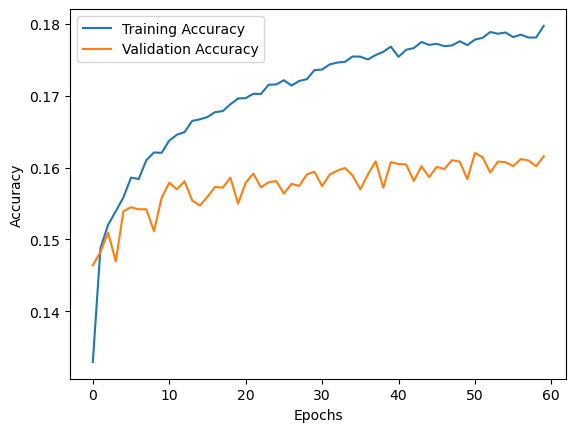

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
# Saving the model
model.save('Sequential_model.h5')